In [4]:
import torchvision.transforms as transforms
from torchvision.datasets import OxfordIIITPet
from torch.utils.data.dataloader import default_collate
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

trainval_data = datasets.OxfordIIITPet(root="data", split="trainval", target_types="category", download=True, transform=transform)
test_data = datasets.OxfordIIITPet(root="data", split="test", target_types="category", download=True, transform=transform)
combined_data = ConcatDataset([trainval_data, test_data])

train_size = int(0.7 * len(combined_data))
val_size = int(0.15 * len(combined_data))
test_size = len(combined_data) - train_size - val_size
train_data, val_data, test_data = random_split(combined_data, [train_size, val_size, test_size])

In [6]:
train_class = [0] * 37
val_class = [0] * 37
test_class = [0] * 37

for data in train_data:
    train_class[data[1]] += 1

for data in val_data:
    val_class[data[1]] += 1

for data in test_data:
    test_class[data[1]] += 1

<BarContainer object of 37 artists>

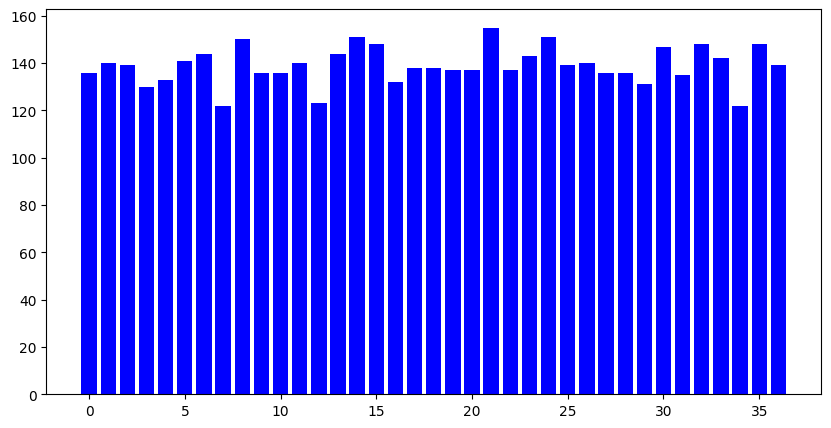

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(range(37), train_class, color='b', label='train')

<BarContainer object of 37 artists>

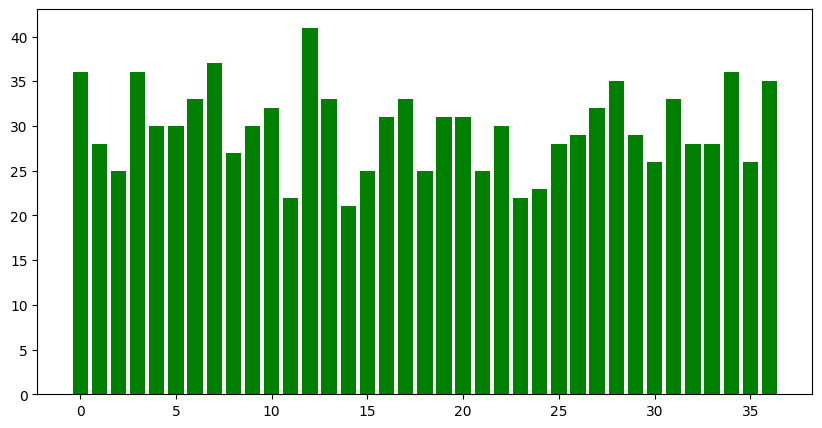

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(range(37), val_class, color='g', label='val')

<BarContainer object of 37 artists>

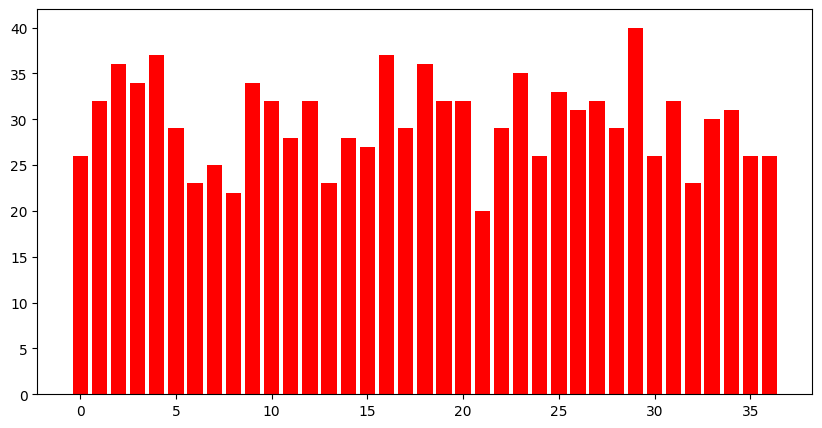

In [10]:
plt.figure(figsize=(10, 5))
plt.bar(range(37), test_class, color='r', label='test')